# Burgers' equation

Given the Burgers’ equation in 1D $\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$ build a numerical code to solve it on a grid
with extent $x \in [0, 10]$ and with initial conditions given by
$$u(x, t = 0) = 10 e^{−(x−x_0)^2},$$
with $x_0 = 5$. Compute the solution using both the flux-conservative and the non flux-conservative versions of the upwind scheme. Use Courant factor $c_f = 0.5$, a grid with at least $J = 101$ points with periodic boundary conditions, and terminate the evolution at $t = 0.5$.

Compare the solutions computed with the two different methods by plotting $u(x, t)$ at different times (including $t = 0.5$). What happens when you increase the resolution?

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio.v2 as imageio
from IPython.display import HTML
import matplotlib.image as mpimg
from matplotlib.image import imread
from matplotlib.patches import Patch

In [94]:
plt.rcParams.update({
    "text.usetex": True,            # Use LaTeX for text rendering
    "font.family": "serif",         # Use serif fonts (LaTeX default)
    "font.serif": ["Computer Modern Roman"],  # Default LaTeX font
})

In [95]:
# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

t_final = 0.5
cf = 0.5

In [96]:
# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

## Characteristics

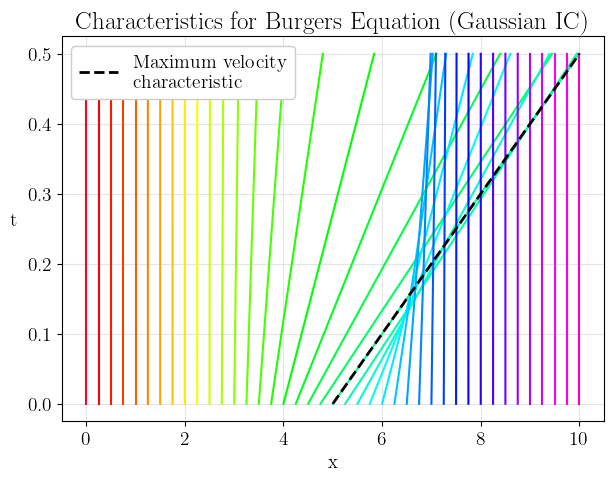

In [97]:
N = 41
cmap = plt.cm.gist_rainbow

# Initial x grid
x_i = np.linspace(0, L, N)
u_i = 10*np.exp(-(x_i-x0)**2)

# The characteristics are straight lines -> I only need two points for each one
times = [0.0, t_final]

plt.figure(figsize=(7,5))
positions_max = []

for i, xi, ui in zip(range(len(x_i)), x_i, u_i):
    x_f = xi + ui*t_final
    positions = [xi, x_f]
    color = cmap(i / (N-1))
    plt.plot(positions, times, color=color)

    if (ui == max(u_i)):
        positions_max = positions
        
plt.plot(positions_max, times, color='black', ls = '--', lw = 2, label = 'Maximum velocity \ncharacteristic')

plt.xlabel('x', fontsize = 14)
plt.ylabel('t', rotation = 0, labelpad = 10, fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Characteristics for Burgers Equation (Gaussian IC)", fontsize = 18)
plt.grid(alpha = 0.2, c = 'grey')
plt.legend(loc='upper left', fontsize = 14, framealpha = 1)

figname = f"./Burgers_characteristics.png"
plt.savefig(figname, dpi=200, bbox_inches='tight')
plt.show()

## FC upwind method

In [98]:
# Initialize the solution array
u_current = u_initial.copy()

time=[]
time.append(0.0)

In [99]:
# Create directory to save images if there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_FC'):
    os.makedirs('./images_FC')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1\Burgers equation


['.ipynb_checkpoints',
 'Burgers equation.ipynb',
 'Burgers_characteristics.png',
 'Burgers_equation_movies',
 'images_FC',
 'images_NFC']

In [100]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
# Note: I'm plotting things with a very big fontsize for better visibility in the report
plt.plot(x, u_current, c = 'darkturquoise', label='FC')
plt.title('Time = '+ str(round(t,2)), fontsize = 24)
plt.ylim(0,11)
plt.xlabel('x', fontsize = 22)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')

# To save the figure with the courant factor, the number of points on the x axis and the timestamp info
n_str = f"{nx:04d}"
i_str = f"{i:05d}"
figname = f"./images_FC/fig_FC_n{n_str}_t{i_str}.png"

plt.savefig(figname, dpi=200, bbox_inches='tight')
plt.close()

#solve the Burgers equation
while t < t_final:

    # Since dt is defined as dt = cf * dx/max(|u_j|), I need to compute it for every time step
    umax = np.max(np.abs(u_current))
    dt = cf * dx / umax
    dt = min(dt, t_final - t)     # In case dt+t > t_final

    # Compute the new solution using the upwind method for the flux-conservative form
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions

    u_next = u_current - (dt/dx)*(0.5*(u_current)**2 - 0.5*(np.roll(u_current, 1))**2)
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #add the time to the time vector
    time.append(t)
    
    #plot the current result and save in an image one every 5 iterations

    if (i%5==0 or t==t_final):
    
        plt.plot(x, u_current, c='darkturquoise', label='FC')
        plt.title('Time = '+str(round(t,2)), fontsize = 24)
        plt.ylim(0,11)
        plt.xlabel('x', fontsize = 22)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 22)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.legend(loc='upper right', fontsize = 16, framealpha = 1)
        i_str = f"{i:05d}"
        figname = f"./images_FC/fig_FC_n{n_str}_t{i_str}.png"
        plt.savefig(figname, dpi=200, bbox_inches='tight')
        plt.close()

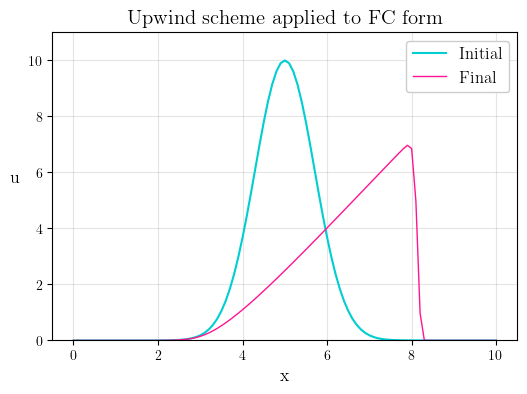

In [101]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink', lw = 1)
plt.title('Upwind scheme applied to FC form', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,11)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [102]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_FC/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)

output_dir = "./Burgers_equation_movies/"
os.makedirs(output_dir, exist_ok=True)  # Create if it doesn't exist

n_filter = nx 

files = sorted(f for f in os.listdir(directory) if f.endswith('.png'))

# Filter files based on number of points
filtered_files = [
    f for f in files
    if f.startswith(f"fig_FC_n{n_filter:04d}_")
]

movie_title = os.path.join(output_dir, f"movie_FC_n{n_filter:04d}.mp4")

# Create the movie
with imageio.get_writer(movie_title, mode='I', quality=10) as writer:
    for file in filtered_files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1145, 975) to (1152, 976) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


C:\Users\lilit\reps\Numerical_relativity\Homework_1\Burgers equation

Sorted files: ['.ipynb_checkpoints', 'fig_FC_n0101_t00000.png', 'fig_FC_n0101_t00005.png', 'fig_FC_n0101_t00010.png', 'fig_FC_n0101_t00015.png', 'fig_FC_n0101_t00020.png', 'fig_FC_n0101_t00025.png', 'fig_FC_n0101_t00030.png', 'fig_FC_n0101_t00035.png', 'fig_FC_n0101_t00040.png', 'fig_FC_n0101_t00045.png', 'fig_FC_n0101_t00050.png', 'fig_FC_n0101_t00055.png', 'fig_FC_n0101_t00060.png', 'fig_FC_n0101_t00065.png', 'fig_FC_n0101_t00070.png', 'fig_FC_n0101_t00075.png', 'fig_FC_n0101_t00080.png', 'fig_FC_n0101_t00085.png', 'fig_FC_n0101_t00086.png', 'fig_FC_n0251_t00000.png', 'fig_FC_n0251_t00005.png', 'fig_FC_n0251_t00010.png', 'fig_FC_n0251_t00015.png', 'fig_FC_n0251_t00020.png', 'fig_FC_n0251_t00025.png', 'fig_FC_n0251_t00030.png', 'fig_FC_n0251_t00035.png', 'fig_FC_n0251_t00040.png', 'fig_FC_n0251_t00045.png', 'fig_FC_n0251_t00050.png', 'fig_FC_n0251_t00055.png', 'fig_FC_n0251_t00060.png', 'fig_FC_n0251_t00065.png', 'f

In [103]:
# Displaying the movie

HTML(f"""
<div align="middle">
  <video width="50%" controls>
    <source src="{movie_title}" type="video/mp4">
  </video>
</div>
""")

In [104]:
# I want to plot the solution at t = 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, but except for 0.0 and 0.5, the values are not precise.
# I could have selected the closest times by hand and then have the program run again, but - even at cost of repetition - 
# I'll take the lazy way and have the program do it automatically.

target_times = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

selected_times = []

for t_target in target_times:
    # find index of the closest time
    idx = np.abs(time - t_target).argmin()
    selected_times.append(time[idx])

print(selected_times)
# for t in selected_times:
#     print(round(t, 1))

[0.0, 0.10244140888967677, 0.19920302888325628, 0.3029825573831742, 0.39765061029884613, 0.5]


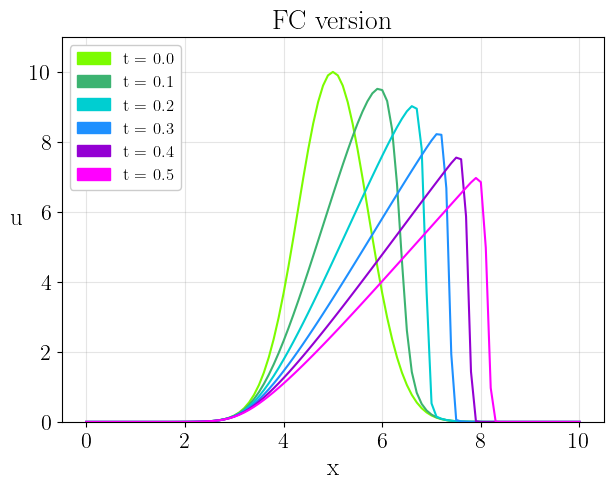

In [105]:
# Run the for cycle again saving the times of interest
u_current = u_initial.copy()

colors = ['lawngreen', 'mediumseagreen', 'darkturquoise', 'dodgerblue', 'darkviolet', 'magenta']
legend_patches = []

# Initialize time and iteration counter
t = 0.0
i = 0
j = 0

plt.figure(figsize=(7, 5))

#save the initial conditions
# Note: I'm plotting things with a very big fontsize for better visibility in the report
#plt.plot(x, u_current, c = colors[j], label='t = %.1f' % t)
plt.plot(x, u_current, color = colors[j])
legend_patches.append(Patch(color=colors[j], label='t = %.1f' % t))
j += 1

#solve the advection equation
while t < t_final:

    # Since dt is defined as dt = cf * dx/max(|u_j|), I need to compute it for every time step
    umax = np.max(np.abs(u_current))
    dt = cf * dx / umax
    dt = min(dt, t_final - t)     # In case dt+t > t_final

    u_next = u_current - (dt/dx)*(0.5*(u_current)**2 - 0.5*(np.roll(u_current, 1))**2)
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
        
    #plot the result if it's one of the times we chose before

    if (t in selected_times):
    
        #plt.plot(x, u_current, c=colors[j], label='t = %.1f' % t)
        plt.plot(x, u_current, color = colors[j])
        legend_patches.append(Patch(color=colors[j], label='t = %.1f' % t))
        j += 1


plt.title('FC version', fontsize = 20)
plt.ylim(0,11)
plt.xlabel('x', fontsize = 18)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid(alpha = 0.2, c = 'grey')
plt.legend(handles=legend_patches, loc='upper left', fontsize = 12, framealpha = 1)

n_str = f"{nx:04d}"
figname = f"./images_FC/progression_FC_n{n_str}.png"
plt.savefig(figname, dpi=200, bbox_inches='tight')
plt.show()
plt.close()

## NFC upwind method

In [106]:
# Initialize the solution array
u_current = u_initial.copy()

time=[]
time.append(0.0)

In [107]:
# Create directory to save images if there isn't one yet
print(os.getcwd())
if not os.path.exists('./images_NFC'):
    os.makedirs('./images_NFC')
os.listdir('./')

C:\Users\lilit\reps\Numerical_relativity\Homework_1\Burgers equation


['.ipynb_checkpoints',
 'Burgers equation.ipynb',
 'Burgers_characteristics.png',
 'Burgers_equation_movies',
 'images_FC',
 'images_NFC']

In [108]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
# Note: I'm plotting things with a very big fontsize for better visibility in the report
plt.plot(x, u_current, c = 'darkturquoise', label='NFC')
plt.title('Time = '+ str(round(t,2)), fontsize = 24)
plt.ylim(0,11)
plt.xlabel('x', fontsize = 22)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')

# To save the figure with the courant factor, the number of points on the x axis and the timestamp info
n_str = f"{nx:04d}"
i_str = f"{i:05d}"
figname = f"./images_NFC/fig_NFC_n{n_str}_t{i_str}.png"

plt.savefig(figname, dpi=200, bbox_inches='tight')
plt.close()

#solve the Burgers equation
while t < t_final:

    # Since dt is defined as dt = cf * dx/max(|u_j|), I need to compute it for every time step
    umax = np.max(np.abs(u_current))
    dt = cf * dx / umax
    dt = min(dt, t_final - t)     # In case dt+t > t_final

    # Compute the new solution using the upwind method for the flux-conservative form
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions

    u_next = u_current - (dt/dx)*(u_current)*(u_current - np.roll(u_current, 1))
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
    
    #add the time to the time vector
    time.append(t)
    
    #plot the current result and save in an image one every 5 iterations

    if (i%5==0 or t==t_final):
    
        plt.plot(x, u_current, c='darkturquoise', label='NFC')
        plt.title('Time = '+str(round(t,2)), fontsize = 24)
        plt.ylim(0,11)
        plt.xlabel('x', fontsize = 22)
        plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 22)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.grid(alpha = 0.2, c = 'grey')
        plt.legend(loc='upper right', fontsize = 16, framealpha = 1)
        i_str = f"{i:05d}"
        figname = f"./images_NFC/fig_NFC_n{n_str}_t{i_str}.png"
        plt.savefig(figname, dpi=200, bbox_inches='tight')
        plt.close()

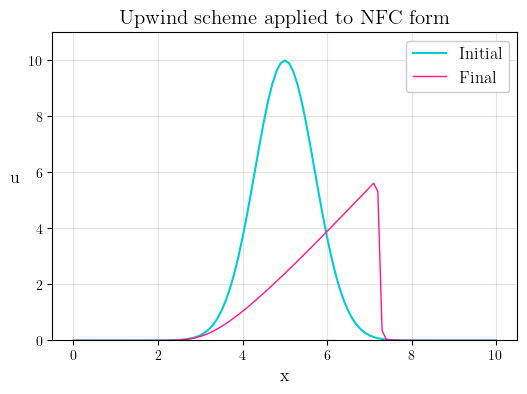

In [109]:
# Plot the final solution
plt.figure(figsize=(6, 4))
plt.plot(x, u_initial, label='Initial', c = 'darkturquoise')
plt.plot(x, u_current, label='Final', c = 'deeppink', lw = 1)
plt.title('Upwind scheme applied to NFC form', fontsize = 15)
#plt.title('Time='+str(round(t,2)), fontsize = 15)
plt.ylim(0,11)
plt.xlabel('x', fontsize = 13)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 13)
plt.legend(fontsize = 12, framealpha = 1)
plt.grid(alpha = 0.2, c = 'grey')
plt.show()

In [110]:
# Check your current working directory
print(os.getcwd())

# Set the directory where the images are stored
directory = "./images_NFC/"

files = os.listdir(directory)
files = sorted(files)
print("\nSorted files:", files)

output_dir = "./Burgers_equation_movies/"
os.makedirs(output_dir, exist_ok=True)  # Create if it doesn't exist

n_filter = nx 

files = sorted(f for f in os.listdir(directory) if f.endswith('.png'))

# Filter files based on number of points
filtered_files = [
    f for f in files
    if f.startswith(f"fig_NFC_n{n_filter:04d}_")
]

movie_title = os.path.join(output_dir, f"movie_NFC_n{n_filter:04d}.mp4")

# Create the movie
with imageio.get_writer(movie_title, mode='I', quality=10) as writer:
    for file in filtered_files:
        image = imageio.imread(os.path.join(directory, file))
        writer.append_data(image)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1145, 975) to (1152, 976) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


C:\Users\lilit\reps\Numerical_relativity\Homework_1\Burgers equation

Sorted files: ['.ipynb_checkpoints', 'fig_NFC_n0101_t00000.png', 'fig_NFC_n0101_t00005.png', 'fig_NFC_n0101_t00010.png', 'fig_NFC_n0101_t00015.png', 'fig_NFC_n0101_t00020.png', 'fig_NFC_n0101_t00025.png', 'fig_NFC_n0101_t00030.png', 'fig_NFC_n0101_t00035.png', 'fig_NFC_n0101_t00040.png', 'fig_NFC_n0101_t00045.png', 'fig_NFC_n0101_t00050.png', 'fig_NFC_n0101_t00055.png', 'fig_NFC_n0101_t00060.png', 'fig_NFC_n0101_t00065.png', 'fig_NFC_n0101_t00070.png', 'fig_NFC_n0101_t00075.png', 'fig_NFC_n0101_t00080.png', 'fig_NFC_n0101_t00081.png', 'fig_NFC_n0251_t00000.png', 'fig_NFC_n0251_t00005.png', 'fig_NFC_n0251_t00010.png', 'fig_NFC_n0251_t00015.png', 'fig_NFC_n0251_t00020.png', 'fig_NFC_n0251_t00025.png', 'fig_NFC_n0251_t00030.png', 'fig_NFC_n0251_t00035.png', 'fig_NFC_n0251_t00040.png', 'fig_NFC_n0251_t00045.png', 'fig_NFC_n0251_t00050.png', 'fig_NFC_n0251_t00055.png', 'fig_NFC_n0251_t00060.png', 'fig_NFC_n0251_t00065.png

In [111]:
# Displaying the movie

HTML(f"""
<div align="middle">
  <video width="50%" controls>
    <source src="{movie_title}" type="video/mp4">
  </video>
</div>
""")

In [112]:
# I want to plot the solution at t = 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, but except for 0.0 and 0.5, the values are not precise.
# I could have selected the closest times by hand and then have the program run again, but - even at cost of repetition - 
# I'll take the lazy way and have the program do it automatically.

target_times = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])

selected_times = []

for t_target in target_times:
    # find index of the closest time
    idx = np.abs(time - t_target).argmin()
    selected_times.append(time[idx])

print(selected_times)
# for t in selected_times:
#     print(round(t, 1))

[0.0, 0.10259246630120238, 0.2006917523920005, 0.2982210857423645, 0.3976669686012121, 0.5]


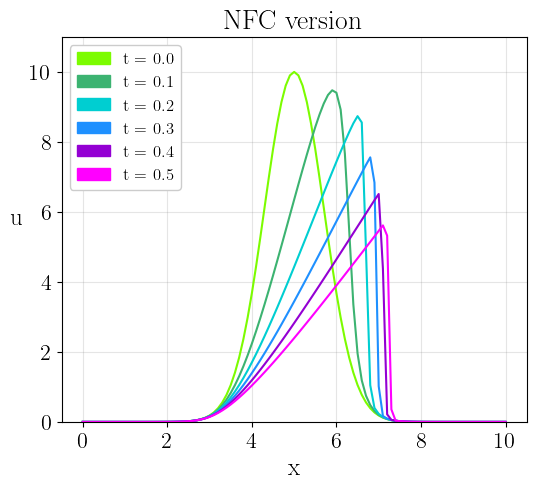

In [113]:
# Run the for cycle again saving the times of interest
u_current = u_initial.copy()

colors = ['lawngreen', 'mediumseagreen', 'darkturquoise', 'dodgerblue', 'darkviolet', 'magenta']
legend_patches = []

# Initialize time and iteration counter
t = 0.0
i = 0
j = 0

plt.figure(figsize=(6, 5))

#save the initial conditions
# Note: I'm plotting things with a very big fontsize for better visibility in the report
#plt.plot(x, u_current, c = colors[j], label='t = %.1f' % t)
plt.plot(x, u_current, color = colors[j])
legend_patches.append(Patch(color=colors[j], label='t = %.1f' % t))
j += 1

#solve the advection equation
while t < t_final:

    # Since dt is defined as dt = cf * dx/max(|u_j|), I need to compute it for every time step
    umax = np.max(np.abs(u_current))
    dt = cf * dx / umax
    dt = min(dt, t_final - t)     # In case dt+t > t_final

    u_next = u_current - (dt/dx)*(u_current)*(u_current - np.roll(u_current, 1))
    
    # Update the solution
    u_current = u_next.copy()

    #advance the time 
    t += dt
    i += 1
        
    #plot the result if it's one of the times we chose before

    if (t in selected_times):
    
        #plt.plot(x, u_current, c=colors[j], label='t = %.1f' % t)
        plt.plot(x, u_current, color = colors[j])
        legend_patches.append(Patch(color=colors[j], label='t = %.1f' % t))
        j += 1


plt.title('NFC version', fontsize = 20)
plt.ylim(0,11)
plt.xlabel('x', fontsize = 18)
plt.ylabel('u', rotation = 0, labelpad = 10, fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid(alpha = 0.2, c = 'grey')
plt.legend(handles=legend_patches, loc='upper left', fontsize = 12, framealpha = 1)

n_str = f"{nx:04d}"
figname = f"./images_NFC/progression_NFC_n{n_str}.png"
plt.savefig(figname, dpi=200, bbox_inches='tight')
plt.show()
plt.close()